In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Téléchargement de principals

In [2]:
principals = pd.read_csv('https://datasets.imdbws.com/title.principals.tsv.gz', sep ='\t', usecols=['tconst', 'nconst', 'category'])

In [3]:
principals.head()

,tconst,nconst,category
0,tt0000001,nm1588970,self
1,tt0000001,nm0005690,director
2,tt0000001,nm0374658,cinematographer
3,tt0000002,nm0721526,director
4,tt0000002,nm1335271,composer


## Création df avec les acteurs et actrices

In [4]:
# valeurs dans category
principals.category.value_counts()

actor                  10728970
self                    8292356
actress                 8144982
writer                  6364103
director                5514938
producer                3029350
composer                1680068
cinematographer         1674903
editor                  1586243
production_designer      333610
archive_footage          298311
archive_sound              2826
Name: category, dtype: int64

In [5]:
# création df d'acteurs et actrices
actors_df = principals[(principals['category'] == 'actor')|(principals['category'] == 'actress')]

## Merge avec names.basics

In [6]:
names = pd.read_csv("https://datasets.imdbws.com/name.basics.tsv.gz", sep ='\t')

In [7]:
# merge actor & names
actors = actors_df.merge(names, how = 'inner', on = 'nconst')

In [8]:
actors.head()

,tconst,nconst,category,primaryName,birthYear,deathYear,primaryProfession,knownForTitles
0,tt0000005,nm0443482,actor,Charles Kayser,1878,1966,actor,tt0000005
1,tt0000005,nm0653042,actor,John Ott,1850,1931,actor,tt0000005
2,tt0000007,nm0179163,actor,James J. Corbett,1866,1933,"actor,writer","tt0034778,tt0163131,tt0003730,tt0003116"
3,tt0003116,nm0179163,actor,James J. Corbett,1866,1933,"actor,writer","tt0034778,tt0163131,tt0003730,tt0003116"
4,tt0003730,nm0179163,actor,James J. Corbett,1866,1933,"actor,writer","tt0034778,tt0163131,tt0003730,tt0003116"


In [9]:
# suppression des colonnes inutiles
actors.drop(['primaryProfession', 'knownForTitles'], axis = 1, inplace = True)

## Principales infos

In [10]:
actors.shape

(18857411, 6)

In [11]:
actors.dtypes

tconst         object
nconst         object
category       object
primaryName    object
birthYear      object
deathYear      object
dtype: object

## Valeurs manquantes

In [12]:
# NaN
actors = actors.replace('\\N', np.NaN)

In [13]:
((actors.isna().sum()/ actors.shape[0]) *100).sort_values()

# 46% de valeurs manquantes dans birthYear et 87 dans DeathYear ==> normal, les acteurs ne sont pas tous morts

tconst          0.000000
nconst          0.000000
category        0.000000
primaryName     0.000000
birthYear      46.102363
deathYear      87.475699
dtype: float64

In [14]:
# colonne category astype category
actors['category'] = actors['category'].astype('category')

# Visualisations

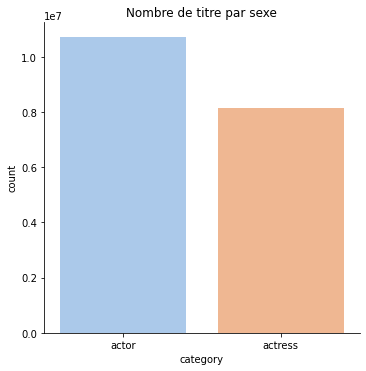

In [15]:
# répartition acteurs/actrice
sns.catplot(data=actors, x='category', kind='count', palette = 'pastel')
plt.title('Nombre de titre par sexe')
plt.show()

In [16]:
# quel acteur ou actrice est le plus représenté (toute catégorie de film confondue)
actors['primaryName'].value_counts().head()

Sameera Sherief        10126
Delhi Kumar             7834
Subhalekha Sudhakar     7146
Neha Gowda              6213
Sudha Chandran          5878
Name: primaryName, dtype: int64

In [17]:
# acteur le plus représenté
actors.loc[actors['category'] == 'actor', 'primaryName'].value_counts()

Delhi Kumar            7834
Subhalekha Sudhakar    7146
Yuma Sanada            5848
Yuki Nozawa            5848
Peter Hobbs            5037
                       ... 
Pascal Bernard            1
Samuel Haskell            1
Adrian Adam               1
Man-hsu Chung             1
Vincent Zur Linden        1
Name: primaryName, Length: 1206183, dtype: int64

In [18]:
# actrice le plus représentée
actors.loc[actors['category'] == 'actress', 'primaryName'].value_counts()

Sameera Sherief       10126
Neha Gowda             6213
Sudha Chandran         5878
Jada Rowland           5628
Pallavi Ramisetty      5606
                      ...  
Francis Campbell          1
Dianna W. Mitchell        1
María José Herrero        1
Ariane Colas              1
Kate Jaeger               1
Name: primaryName, Length: 760794, dtype: int64

La personnalité qui apparait dans le plus de titre est une femme !

In [19]:
# nombre de titre par acteur(trice)
print("Nombre d'acteurs(trices) ayant plus de 100 titres à son palmares: ", sum(actors['primaryName'].value_counts().values > 100))
print("Nombre d'acteurs(trices) ayant plus de 1000 titres à son palmares: ", sum(actors['primaryName'].value_counts().values > 1000))


Nombre d'acteurs(trices) ayant plus de 100 titres à son palmares:  31147
Nombre d'acteurs(trices) ayant plus de 1000 titres à son palmares:  1559


In [20]:
# nombre moyen d'acteur par titre
actor_per_film = actors.groupby('tconst')['category'].count()

## Création dataframe d'acteurs vivant 

In [21]:
# création dataset sans NaN sur birthYear
actors_clean = actors.copy().dropna(subset=['birthYear'])

In [22]:
actors_clean.isna().sum()

tconst               0
nconst               0
category             0
primaryName          0
birthYear            0
deathYear      7847501
dtype: int64

In [23]:
# création DF avec les acteurs dont on a pas la date de mort
actors_sans_death = actors_clean[actors_clean['deathYear'].isna()]

In [24]:
living_actors = actors_sans_death.copy()

In [25]:
living_actors.drop(columns=['deathYear'], inplace=True)

In [26]:
living_actors['birthYear'] = living_actors['birthYear'].astype(int)

In [27]:
print('Birthyear Min: ', living_actors['birthYear'].min())
print('Birthyear Max: ', living_actors['birthYear'].max())



Birthyear Min:  21
Birthyear Max:  2021


In [28]:
# supression de la ligne ou birtYear = 21
living_actors.drop(living_actors[living_actors['birthYear'] == 21].index, inplace=True)


In [29]:
# création colonne age 



def age(birthY):
    
    today = date.today()
    return today.year - birthY

living_actors['age'] = living_actors['birthYear'].apply(age)

In [30]:
living_actors.head()

,tconst,nconst,category,primaryName,birthYear,age
28,tt0000014,nm0244989,actor,Benoît Duval,1881,140
708,tt0000399,nm0925513,actor,Thomas White,1898,123
709,tt0131934,nm0925513,actor,Thomas White,1898,123
1174,tt0000439,nm2313241,actor,John Manus Dougherty Sr.,1885,136
1175,tt0000442,nm0622273,actress,Francesca Nathansen,1864,157


In [31]:
print('age minimal: ', living_actors['age'].min() )
print('age maximal: ', living_actors['age'].max() )

age minimal:  0
age maximal:  933


In [32]:
# supression des personnes ayant plus de 120 ans
living_actors.drop(living_actors[living_actors['age'] > 120].index, inplace=True)

In [33]:
def age_period(age):
    if age < 18:
        return '<18'
    elif 18 <=age < 30:
        return '18-30'
    elif 30 <=age < 40:
        return '30-40'
    elif 40 <=age < 50:
        return '40-50'
    elif 50 <= age < 60:
        return '50-60'
    elif 60 <=age < 70:
        return '60-70'
    elif age >= 70:
        return '> 70'

In [34]:
# ajout d'une colonne avec fourchette age
living_actors['age_fork'] = living_actors['age'].apply(age_period)

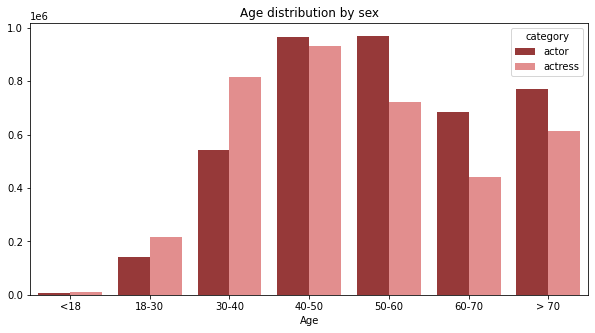

In [35]:
plt.figure(figsize = (10,5))
sns.countplot(data=living_actors, x='age_fork', palette = ['brown', 'lightcoral'], order = ['<18', '18-30', '30-40', '40-50', '50-60', '60-70', '> 70'], hue = 'category')
plt.title('Age distribution by sex')
plt.xlabel('Age')
plt.ylabel('')
plt.show()

Une grande partie des acteurs a entre 40/50 ans. Il y a plus d'acteur après 50 ans que d'actrices

In [36]:

# df avec les acteurs morts
actors_clean_death = actors_clean[actors_clean['deathYear'].notna()]
dead_actors = actors_clean_death.copy()
dead_actors.head()

,tconst,nconst,category,primaryName,birthYear,deathYear
0,tt0000005,nm0443482,actor,Charles Kayser,1878,1966
1,tt0000005,nm0653042,actor,John Ott,1850,1931
2,tt0000007,nm0179163,actor,James J. Corbett,1866,1933
3,tt0003116,nm0179163,actor,James J. Corbett,1866,1933
4,tt0003730,nm0179163,actor,James J. Corbett,1866,1933


In [41]:
dead_actors['birthYear'] = dead_actors['birthYear'].astype(int)
dead_actors['deathYear'] = dead_actors['deathYear'].astype(int)

In [42]:
dead_actors['death_age'] = dead_actors['deathYear'] - dead_actors['birthYear']

In [43]:
dead_actors.head()

,tconst,nconst,category,primaryName,birthYear,deathYear,death_age
0,tt0000005,nm0443482,actor,Charles Kayser,1878,1966,88
1,tt0000005,nm0653042,actor,John Ott,1850,1931,81
2,tt0000007,nm0179163,actor,James J. Corbett,1866,1933,67
3,tt0003116,nm0179163,actor,James J. Corbett,1866,1933,67
4,tt0003730,nm0179163,actor,James J. Corbett,1866,1933,67


In [44]:
# concat des deux dataframe
actors = pd.concat([living_actors, dead_actors], ignore_index= True)
actors.head(20)

,tconst,nconst,category,primaryName,birthYear,age,age_fork,deathYear,death_age
0,tt0001591,nm0558869,actor,Maurice Mathieu,1906,115.0,> 70,NaN,NaN
1,tt0002369,nm0558869,actor,Maurice Mathieu,1906,115.0,> 70,NaN,NaN
2,tt0208195,nm0558869,actor,Maurice Mathieu,1906,115.0,> 70,NaN,NaN
3,tt0255843,nm0558869,actor,Maurice Mathieu,1906,115.0,> 70,NaN,NaN
4,tt0444772,nm0558869,actor,Maurice Mathieu,1906,115.0,> 70,NaN,NaN
5,tt0444886,nm0558869,actor,Maurice Mathieu,1906,115.0,> 70,NaN,NaN
6,tt0444888,nm0558869,actor,Maurice Mathieu,1906,115.0,> 70,NaN,NaN
7,tt0444949,nm0558869,actor,Maurice Mathieu,1906,115.0,> 70,NaN,NaN
8,tt1915565,nm0558869,actor,Maurice Mathieu,1906,115.0,> 70,NaN,NaN
9,tt0002310,nm5076192,actress,Florence Klotz,1901,120.0,> 70,NaN,NaN


In [47]:
movies_rating = pd.read_csv('movies_rating_final.csv', index_col= 0)
movies_rating.head()

,tconst,primaryTitle,originalTitle,startYear,runtimeMinutes,genres,genre 1,genre 2,genre 3,averageRating,numVotes,decade
340,tt0000502,Bohemios,Bohemios,1905,100.0,NaN,NaN,NaN,NaN,4.5,14,1900 - 1910
374,tt0000574,The Story of the Kelly Gang,The Story of the Kelly Gang,1906,70.0,"Action,Adventure,Biography",Action,Adventure,Biography,6.1,736,1900 - 1910
383,tt0000591,The Prodigal Son,L'enfant prodigue,1907,90.0,Drama,Drama,NaN,NaN,5.2,16,1900 - 1910
438,tt0000679,The Fairylogue and Radio-Plays,The Fairylogue and Radio-Plays,1908,120.0,"Adventure,Fantasy",Adventure,Fantasy,NaN,5.3,65,1900 - 1910
923,tt0001790,"Les Misérables, Part 1: Jean Valjean",Les misérables - Époque 1: Jean Valjean,1913,60.0,Drama,Drama,NaN,NaN,6.0,44,1910 - 1920


In [48]:
# merge avec acteurs
movies_actors_rated = movies_rating.merge(actors, how='inner', on = 'tconst')
movies_actors_rated.head()

,tconst,primaryTitle,originalTitle,startYear,runtimeMinutes,genres,genre 1,genre 2,genre 3,averageRating,numVotes,decade,nconst,category,primaryName,birthYear,age,age_fork,deathYear,death_age
0,tt0000574,The Story of the Kelly Gang,The Story of the Kelly Gang,1906,70.0,"Action,Adventure,Biography",Action,Adventure,Biography,6.1,736,1900 - 1910,nm0846894,actor,John Tait,1871,NaN,NaN,1955.0,84.0
1,tt0000574,The Story of the Kelly Gang,The Story of the Kelly Gang,1906,70.0,"Action,Adventure,Biography",Action,Adventure,Biography,6.1,736,1900 - 1910,nm1431224,actor,Nicholas Brierley,1880,NaN,NaN,1935.0,55.0
2,tt0000591,The Prodigal Son,L'enfant prodigue,1907,90.0,Drama,Drama,NaN,NaN,5.2,16,1900 - 1910,nm0906197,actor,Georges Wague,1874,NaN,NaN,1965.0,91.0
3,tt0000591,The Prodigal Son,L'enfant prodigue,1907,90.0,Drama,Drama,NaN,NaN,5.2,16,1900 - 1910,nm1323543,actress,Christiane Mandelys,1873,NaN,NaN,1957.0,84.0
4,tt0000679,The Fairylogue and Radio-Plays,The Fairylogue and Radio-Plays,1908,120.0,"Adventure,Fantasy",Adventure,Fantasy,NaN,5.3,65,1900 - 1910,nm0000875,actor,L. Frank Baum,1856,NaN,NaN,1919.0,63.0


In [52]:
# top 20 movies 
pivot_top20 = pd.pivot_table(movies_actors_rated, index = ['tconst', 'primaryTitle'], values =['averageRating', 'numVotes'])
top20 = pivot_top20.sort_values(['numVotes'], ascending=[False])[:20]
top20

,,averageRating,numVotes
tconst,primaryTitle,,
tt0111161,The Shawshank Redemption,9.3,2481059
tt0468569,The Dark Knight,9.0,2435428
tt1375666,Inception,8.8,2185504
tt0137523,Fight Club,8.8,1955085
tt0110912,Pulp Fiction,8.9,1920290
tt0109830,Forrest Gump,8.8,1918376
tt0133093,The Matrix,8.7,1772850
tt0120737,The Lord of the Rings: The Fellowship of the Ring,8.8,1740403
tt0167260,The Lord of the Rings: The Return of the King,8.9,1719139


In [89]:
# acteur des top films: 
top_20_df = pd.DataFrame(top20)
top_20_df = top_20_df.merge(actors, how='inner', on ='tconst')
top_20_df

,tconst,averageRating,numVotes,nconst,category,primaryName,birthYear,age,age_fork,deathYear,death_age
0,tt0111161,9.3,2481059,nm0000151,actor,Morgan Freeman,1937,84.0,> 70,NaN,NaN
1,tt0111161,9.3,2481059,nm0348409,actor,Bob Gunton,1945,76.0,> 70,NaN,NaN
2,tt0111161,9.3,2481059,nm0000209,actor,Tim Robbins,1958,63.0,60-70,NaN,NaN
3,tt0111161,9.3,2481059,nm0006669,actor,William Sadler,1950,71.0,> 70,NaN,NaN
4,tt0468569,9.0,2435428,nm0000323,actor,Michael Caine,1933,88.0,> 70,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
74,tt0102926,8.6,1340544,nm0501435,actress,Kasi Lemmons,1961,60.0,60-70,NaN,NaN
75,tt0848228,8.0,1314041,nm0000375,actor,Robert Downey Jr.,1965,56.0,50-60,NaN,NaN
76,tt0848228,8.0,1314041,nm0424060,actress,Scarlett Johansson,1984,37.0,30-40,NaN,NaN
77,tt0848228,8.0,1314041,nm0262635,actor,Chris Evans,1981,40.0,40-50,NaN,NaN


In [91]:
# acteurs les plus représentés dans le top 20 :
male = top_20_df[top_20_df['category'] == 'actor']
top_actors = pd.DataFrame(male['primaryName'].value_counts())
top_actors = top_actors[top_actors >= 2]
top_actors.dropna(inplace = True)
top_actors

,primaryName
Orlando Bloom,3.0
Ian McKellen,3.0
Brad Pitt,3.0
Elijah Wood,3.0
Christian Bale,3.0
Morgan Freeman,2.0
Ken Watanabe,2.0
Viggo Mortensen,2.0
Leonardo DiCaprio,2.0
Michael Caine,2.0


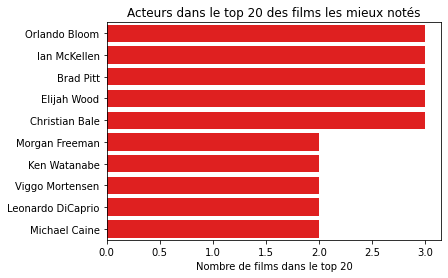

In [92]:
plt.figure()
sns.barplot(y = top_actors.index, x = top_actors.iloc[:, 0], color = 'r')
plt.title("Acteurs dans le top 20 des films les mieux notés")
plt.xlabel('Nombre de films dans le top 20')
plt.show()

In [94]:
# pareil pour les actrices

female = top_20_df[top_20_df['category'] == 'actress']
top_actress = pd.DataFrame(female['primaryName'].value_counts())
top_actress

,primaryName
Anne Hathaway,2
Robin Wright,1
Kerry Washington,1
Diane Kruger,1
Mélanie Laurent,1
Jodie Foster,1
Connie Nielsen,1
Sally Field,1
Kasi Lemmons,1
Jessica Chastain,1


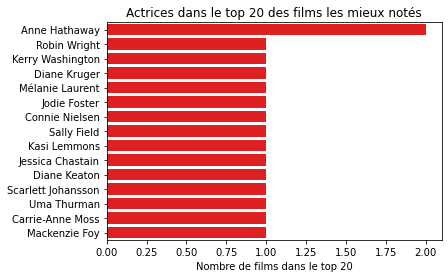

In [96]:
plt.figure()
sns.barplot(y = top_actress.index, x = top_actress.iloc[:, 0], color = 'r')
plt.title("Actrices dans le top 20 des films les mieux notés")
plt.xlabel('Nombre de films dans le top 20')
plt.show()